In [10]:
img = 'all/IMG_0055_00000.png'

import cv2
import numpy as np
import os


def get_percentiles(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)

    percentages = []
    for label_idx in range(1, num_labels):  # skip label 0 (background)
        area = stats[label_idx, cv2.CC_STAT_AREA]
        # Calculate the area as a percentage of the total image area
        percentage_area = round((area / (img.shape[0] * img.shape[1])) * 100, 2)
        percentages.append(percentage_area)
    return percentages


folder_path = "all"  # Replace with the actual path to your folder
largest_percentages = []
largest_percentages = []
all_files = os.listdir(folder_path)
all_files_length = len(all_files)
for idx, filename in enumerate(all_files):
    step = max(1, int(all_files_length * 0.05))
    if (idx + 1) % step == 0:
        progress = round(((idx + 1) / all_files_length) * 100, 2)
        print(f"{progress}% processed")
    if filename.endswith(".png") or filename.endswith(".jpg"):  # Check for image files
        img_path = os.path.join(folder_path, filename)
        percentages = get_percentiles(img_path)
        max_percentage = max(percentages) if percentages else 0
        if max_percentage > 0:
            largest_percentages.append(max_percentage)
        largest_percentages.extend(percentages)


4.99% processed
9.98% processed
14.98% processed
19.97% processed
24.96% processed
29.95% processed
34.94% processed
39.94% processed
44.93% processed
49.92% processed
54.91% processed
59.91% processed
64.9% processed
69.89% processed
74.88% processed
79.87% processed
84.87% processed
89.86% processed
94.85% processed
99.84% processed


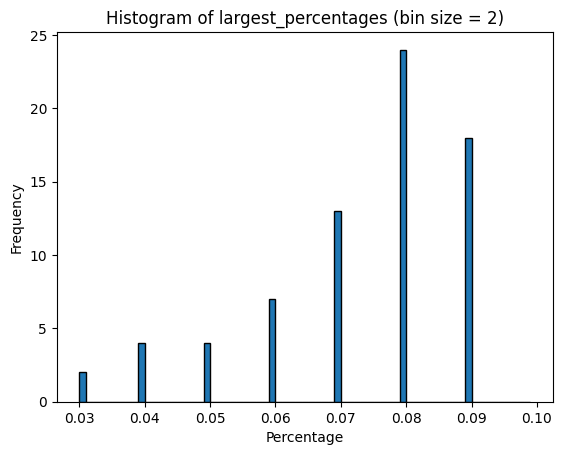

In [19]:
import matplotlib.pyplot as plt

# Create bins with size 2 using numpy's arange
bins = np.arange(min(largest_percentages), 0.1, 0.001)

plt.hist(largest_percentages, bins=bins, edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of largest_percentages (bin size = 2)')
plt.show()